# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Avinash Rai
2. Krishna Bandi

# Importing all the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

Reading loan Data

In [4]:
loan=pd.read_csv(r'C:\Users\avina\Downloads\loan\loan.csv',low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

Find out the percentage of missing values in each column in the given dataset

In [11]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns in the data with 100% missing values. Let's remove all the columns with more than 50% missing values

In [12]:
missing_values = list(missing[missing >= 50].index)
len(missing_values)

57

In [13]:
loan = loan.drop(missing_values,axis=1)
loan.shape

(39717, 54)

!!!!!Let's examin further for missing values.

In [14]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

columns emp_title, emp_length have 6.19% and 2.71% missing value. Let's remove the rows with nan values for these varaibles.

In [15]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [16]:
loan.shape

(37202, 54)

In [17]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

desc                          32.44
title                          0.02
revol_util                     0.12
last_pymnt_d                   0.17
collections_12_mths_ex_med     0.13
chargeoff_within_12_mths       0.13
pub_rec_bankruptcies           1.76
tax_liens                      0.09
dtype: float64

we will also drop desc column because there is 32.44 % of null values and that's not an important column

In [18]:
loan = loan.drop('desc',axis=1)

In [19]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28775
unique emp_length : 11
unique title : 18392
unique revol_util : 1083
unique title : 18392
unique last_pymnt_d : 102
unique last_credit_pull_d : 106
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


There are some columns whose values are in range and are categorical. So, lets take a look at different values of these categorical columns

In [20]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title                         0.02
revol_util                    0.12
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

In [21]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [22]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [23]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [24]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [25]:
loan.tax_liens.unique()

array([ 0., nan])

The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan. The range of values that these categorical columns can take is not of any significant impact to the analysis.
We have decided to drop these columns for further analysis.

In [26]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [27]:
loan.shape

(37202, 50)

lets look at the pub_rec_bankruptcies(Number of public record bankruptcies) categorical column witch have a 1.76% missing data.

In [28]:
loan.pub_rec_bankruptcies.value_counts()

0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35039 records with 0 record of bankrupcies, 1502 records having one bankrupcies case and 7 records with two bankrupcies case.
we will now remove all the rows which have 0 bankruptcy

In [29]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [30]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we have 3 columns title, revol_util and last_pymnt_d which have a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
title gives the title of the loan specified by the borrower in the application.
revol_util gives the revolving line utelization and
last_pymnt_d gives the month in which last payment was received,
and we will remove all the rows which has null values

In [31]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

let's check again for the missing values

In [32]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

as we have removed all the null values from the data, now we will create a new csv file file with no null values for further investigation

In [33]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

In [34]:
pd.read_csv('clean_loan.csv',encoding='utf-8')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36428,158706,158450,12375,12375,1000.0,36 months,10.91%,404.62,C,C3,...,0.00,0.00,Feb-10,4259.11,May-14,1,INDIVIDUAL,0,0,1.0
36429,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,...,0.00,0.00,Aug-08,3891.08,Aug-08,1,INDIVIDUAL,0,0,1.0
36430,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,D3,...,1909.87,668.36,May-08,301.05,May-16,1,INDIVIDUAL,0,0,1.0
36431,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,C4,...,304.20,3.09,Oct-09,1016.15,Mar-10,1,INDIVIDUAL,0,0,1.0


In [35]:
clean_loan = loan[:]

In [36]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

1. id :is a random number given to the loan, does not contribute to analysis
2. member_id : is a random number given to the member, does not contribute to analysis
3. pymnt_plan : value for entire dataset is 'n', therefore can be removed.
4. url : is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. acc_now_delinq : value for entire dataset is '0', therefore can be removed.
10. delinq_amnt : value for entire dataset is '0', therefore can be removed.
11. funded_amnt : value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
12. funded_amnt_inv : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

Dropping all the above columns

In [37]:
not_use_full_colum = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(not_use_full_colum,axis=1)

In [38]:
clean_loan.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,36433.000000,36433.000000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,326.186394,6.930522e+04,13.444131,0.146131,0.86493,9.351604,0.053715,13465.657481,22.245876,...,52.213313,12310.968657,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,207.389943,6.354244e+04,6.643308,0.492199,1.06343,4.373772,0.234995,15702.093047,11.376692,...,378.443825,9048.420885,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,2.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,168.900000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,0.000000,3832.000000,14.000000,...,0.000000,5672.557913,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,283.280000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,0.000000,9030.000000,21.000000,...,0.000000,10101.589360,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,432.220000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,0.000000,17231.000000,29.000000,...,0.000000,16700.719980,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,4.000000,149588.000000,90.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


there are few columns which denote date or month information but are of the type object in the dataframe.
Lets change them 


In [39]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

Let us now take a look at the emp_length column.

In [40]:
clean_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,
emp_length Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Let's convert the column to have values between 0 and 10.

In [41]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [42]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [43]:
clean_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

now,lets remove the 'months' from term column

In [44]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])

now,  we have to split the year and months from earliest_cr_line columns:

In [45]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year

In [46]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

In [47]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100

In [48]:
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

issue_d: The month which the loan was funded .Lets split the available date into month and year column.

In [49]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

now,we have fix all the issues,and ready to analyze the new dataset


In [50]:
clean_loan.to_csv('final_loan.csv', encoding='utf-8', index=False)

# Analysis

In [51]:
pd.read_csv('final_loan.csv', encoding='utf-8')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,2500,60,15.27%,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
1,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
2,3000,60,12.69%,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
3,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
4,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36428,12375,36,10.91%,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,12,2000,12,2007
36429,4800,36,10.28%,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,3,2000,11,2007
36430,9000,36,12.49%,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,8,1997,10,2007
36431,15450,36,11.22%,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,11,1992,8,2007


In [52]:
final_loan = clean_loan[:]

In [53]:
final_loan.shape

(36433, 42)

In [54]:
final_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

now, we need to understand the differences in the features between loans that have been fully paid or charged off.So we only keep the loans with status "Fully Paid" or "Charged Off."

In [55]:
final_loan = final_loan[final_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
final_loan.shape

(35367, 42)

# Univariate Analysis

In [56]:
## Setting up bar plots

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [57]:
# The plots are in percentages 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [58]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (final_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (final_loan.loc[final_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [59]:
(final_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

# The key column - loan_status

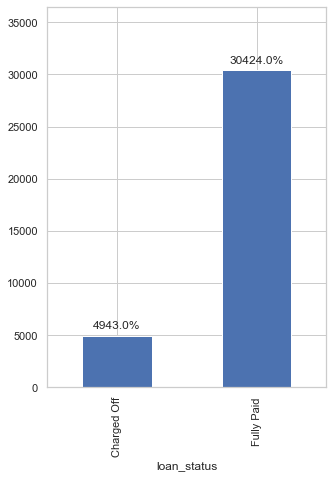

In [81]:
plt.figure(figsize=(5,7))
ax = final_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [82]:
print("%.2f" % (final_loan.loc[final_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_loan)))

13.98


Approximately 14% of loans in the dataset are defaulted.
Any variable that increases percentage of default to higher than 16.5% should be considered as a business risk. (16.5 is 18% higher than 13.97)

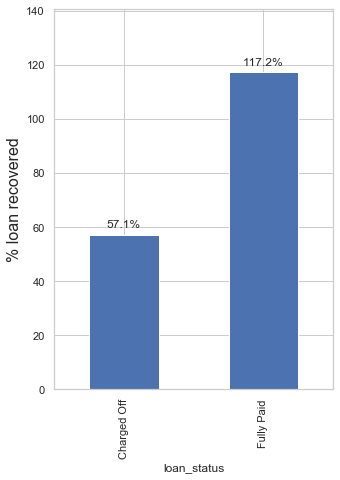

In [83]:
plt.figure(figsize=(5,7))
ax = (final_loan.groupby('loan_status').total_pymnt.sum() * 100 / final_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

Lending Club only recovers 57% of the loan amount when loans are defaulted. and on fully paid up loans, the company makes 17% profit.

Now we will see the factors for defaulters

---
#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

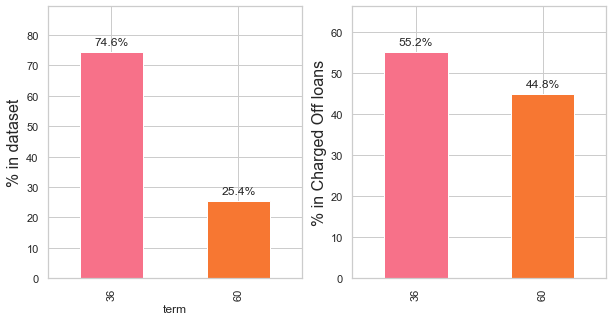

In [84]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'term')

Observation:

1.Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.

2.Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

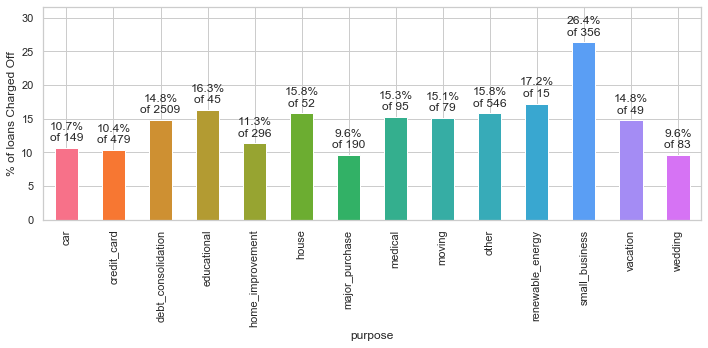

In [65]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'purpose')

**Observation:**
-  <mark>26% of loans for small business are Charged Off. Making them the most risky purpose.</mark> 
- Approximately ~49% of the loans are issued for the purpose of dept consolidation.

---
#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

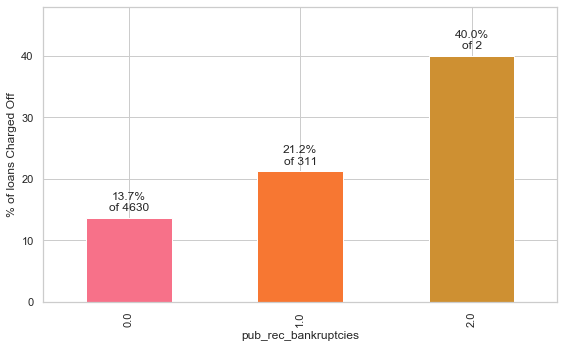

In [66]:
plt.figure(figsize=(8,5))
plotLoanStatus(final_loan, 'pub_rec_bankruptcies')

**Observation:**
-  <mark>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.</mark> 

---
#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [67]:
final_loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

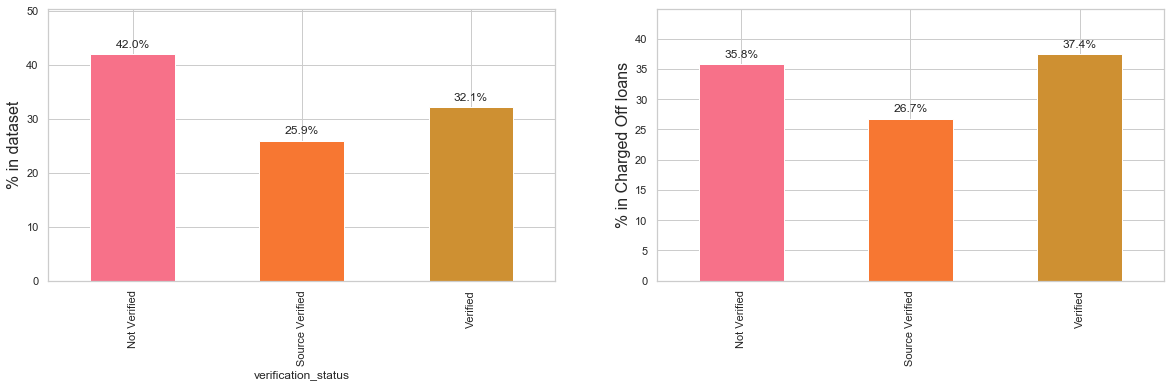

In [68]:
plt.figure(figsize=(20,5))
plot_percentages(final_loan, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis 

---
#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [85]:
final_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [87]:
final_loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

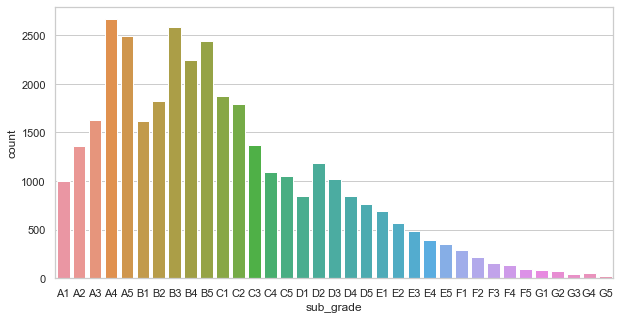

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan['sub_grade'], order=sorted(final_loan.sub_grade.unique()))
plt.show()

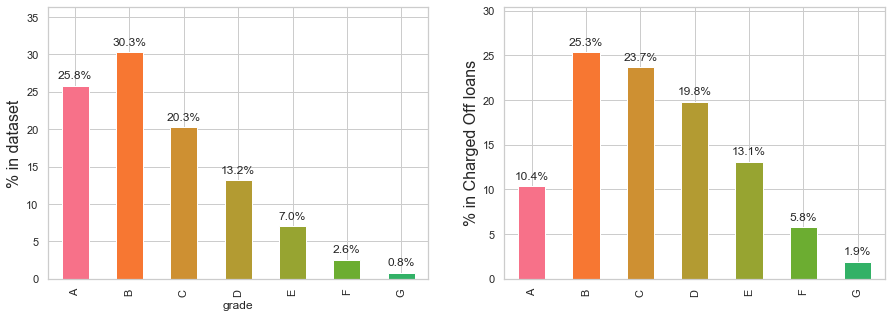

In [91]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'grade', True)

**Observation:**
-  Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans. 
- Grade D, E, F, G loans are less safe.
- Lending Clubs grading system is working well. 

---
#### Variable - inq_last_6mths
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [94]:
final_loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

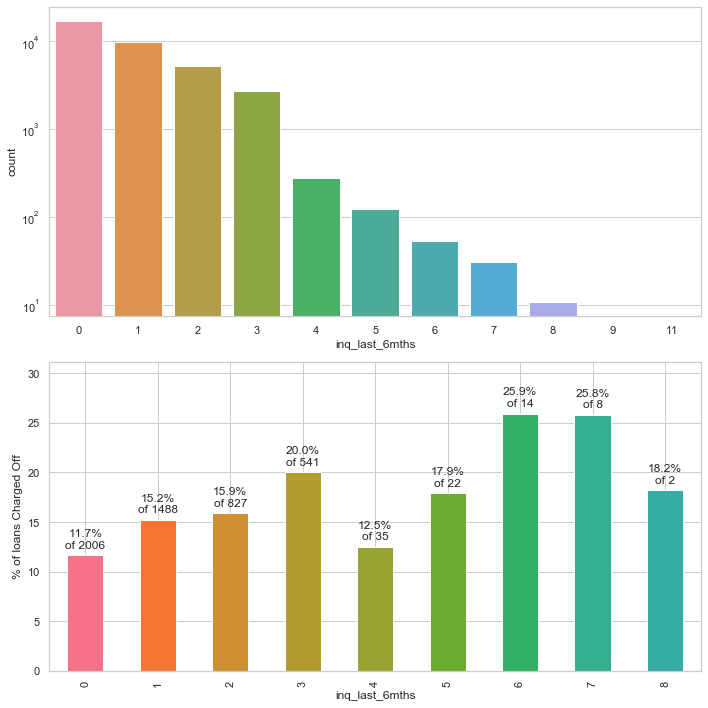

In [96]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(final_loan['inq_last_6mths'], order=sorted(final_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(final_loan, 'inq_last_6mths')
plt.show()

**Observation:**
-  48.5% of the borrowers do not make any inquiry
-  Those with more than 2 inquiries default at higher rates. 
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

### Bivariate Analysis

---
#### loan_amnt vs grade

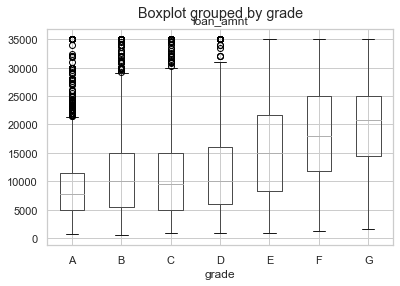

In [76]:
final_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

 **observation**
 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

#### Loan amount vs Grade vs Term

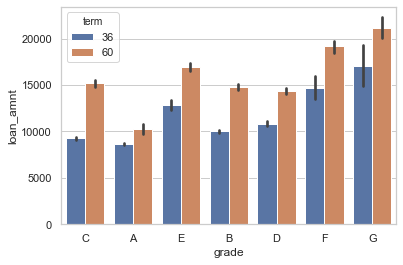

In [78]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=final_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


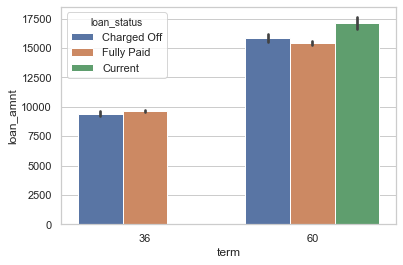

In [79]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

---
####  loan_amnt and annual_inc

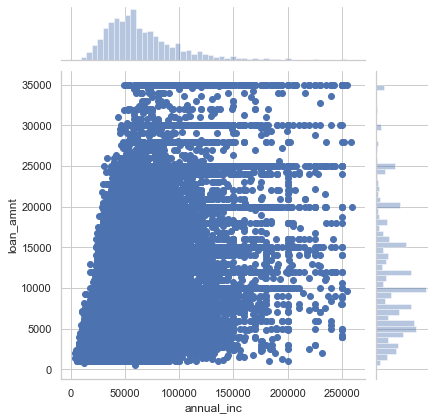

In [97]:
sns.jointplot('annual_inc', 'loan_amnt', final_loan.loc[final_loan['annual_inc']<260000])
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 